# Tasks:
**1. Data Cleaning:**

*- Review the dataset provided.*

In [1]:
import pandas as pd
df = pd.read_csv("Coffee Shop Sales.csv")

In [2]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


*- Identify and rectify any inconsistencies, missing values, or duplicates.*

In [4]:
# Check for missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Get the number of duplicate rows
num_duplicates = len(duplicate_rows)

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


*- Ensure data integrity and consistency.*

In [7]:
# Check data types and ensure they are correct
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

In [8]:
# Ensure consistency in categorical columns (for example, convert to lowercase)
df['store_location'] = df['store_location'].str.lower()
df['product_category'] = df['product_category'].str.lower()
df['product_type'] = df['product_type'].str.lower()
df['product_detail'] = df['product_detail'].str.lower()

**On the above code**

The advantage of converting categorical text values to lowercase is consistency and ease of comparison. By ensuring that all text values are in lowercase, you eliminate discrepancies that may arise from variations in capitalization (e.g., 'Coffee' vs. 'coffee' or 'LOWER MANHATTAN' vs. 'Lower Manhattan'). This makes it easier to perform operations such as filtering, grouping, or comparing values across different columns or datasets. It also helps avoid duplicate entries due to case differences.

In [9]:
# remove negative transaction quantities (assuming they are errors)
df1 = df[df['transaction_qty'] > 0]
df1.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

In [10]:
# remove negative transaction quantities (assuming they are errors)
df1 = df[df['transaction_qty'] > 0]

In [11]:
# Count the number of rows where transaction quantities are greater than 0
num_positive_transactions = len(df1)

# Print the number of positive transactions
print("Number of transactions with positive quantities:", num_positive_transactions)

Number of transactions with positive quantities: 149116


# 2. Profit/Loss Analysis:

*- Compare the products sales and give a graphical representation.*

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Calculate total sales for each transaction
df1['total_sales'] = df1['unit_price'] * df1['transaction_qty']
df1.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,1/1/2023,7:06:11,2,5,lower manhattan,32,3.0,coffee,gourmet brewed coffee,ethiopia rg,6.0
1,2,1/1/2023,7:08:56,2,5,lower manhattan,57,3.1,tea,brewed chai tea,spicy eye opener chai lg,6.2
2,3,1/1/2023,7:14:04,2,5,lower manhattan,59,4.5,drinking chocolate,hot chocolate,dark chocolate lg,9.0
3,4,1/1/2023,7:20:24,1,5,lower manhattan,22,2.0,coffee,drip coffee,our old time diner blend sm,2.0
4,5,1/1/2023,7:22:41,2,5,lower manhattan,57,3.1,tea,brewed chai tea,spicy eye opener chai lg,6.2


In [14]:
# Calculate total sales for each product
product_sales = df1.groupby('product_type')['total_sales'].sum().sort_values(ascending=False)
print("Total Sales Of Products")
product_sales

Total Sales Of Products


product_type
barista espresso         91406.20
brewed chai tea          77081.95
hot chocolate            72416.00
gourmet brewed coffee    70034.60
brewed black tea         47932.00
brewed herbal tea        47539.50
premium brewed coffee    38781.15
organic brewed coffee    37746.50
scone                    36866.12
drip coffee              31984.00
pastry                   25655.99
brewed green tea         23852.50
biscotti                 19793.53
premium beans            14583.50
organic beans             8509.50
housewares                7444.00
gourmet beans             6798.00
clothing                  6163.00
regular syrup             6084.80
espresso beans            5560.25
chai tea                  4301.25
house blend beans         3294.00
herbal tea                2729.75
drinking chocolate        2728.04
black tea                 2711.85
sugar free syrup          2324.00
organic chocolate         1679.60
green tea                 1470.75
green beans               1340.00
N

In [15]:
# Generate a list of colors for each bar
colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue',
    'pink', 'lightcoral', 'yellow', 'lightseagreen', 'violet',
    'aquamarine', 'crimson', 'gold', 'lime', 'orchid',
    'olive', 'teal', 'darkred', 'steelblue', 'peru',
    'mediumvioletred', 'palegreen', 'dodgerblue', 'tomato', 'slategray',
    'indigo', 'cadetblue', 'coral', 'darkorange'
]

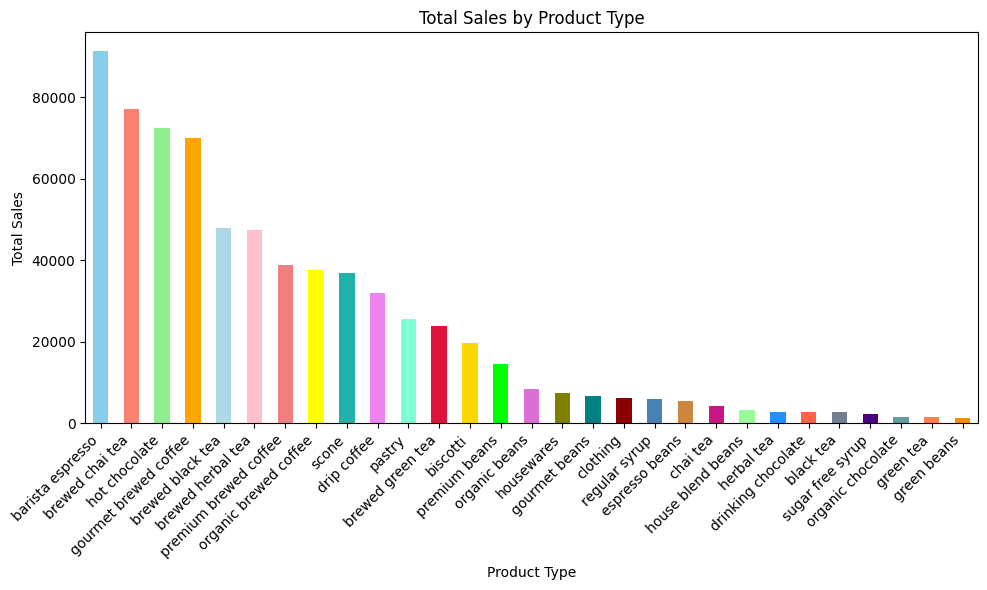

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color=colors)
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*- Identify products/services generating profit and those incurring losses.*

In [17]:
# Identify products generating profit (top 5)
profitable_products = product_sales.head(5)
print("Top 5 Profitable Products:")
profitable_products

Top 5 Profitable Products:


product_type
barista espresso         91406.20
brewed chai tea          77081.95
hot chocolate            72416.00
gourmet brewed coffee    70034.60
brewed black tea         47932.00
Name: total_sales, dtype: float64

In [18]:
# Identify products incurring losses (bottom 5)
loss_products = product_sales.tail(5)
print("Bottom 5 Loss-Incurring Products:")
loss_products

Bottom 5 Loss-Incurring Products:


product_type
black tea            2711.85
sugar free syrup     2324.00
organic chocolate    1679.60
green tea            1470.75
green beans          1340.00
Name: total_sales, dtype: float64

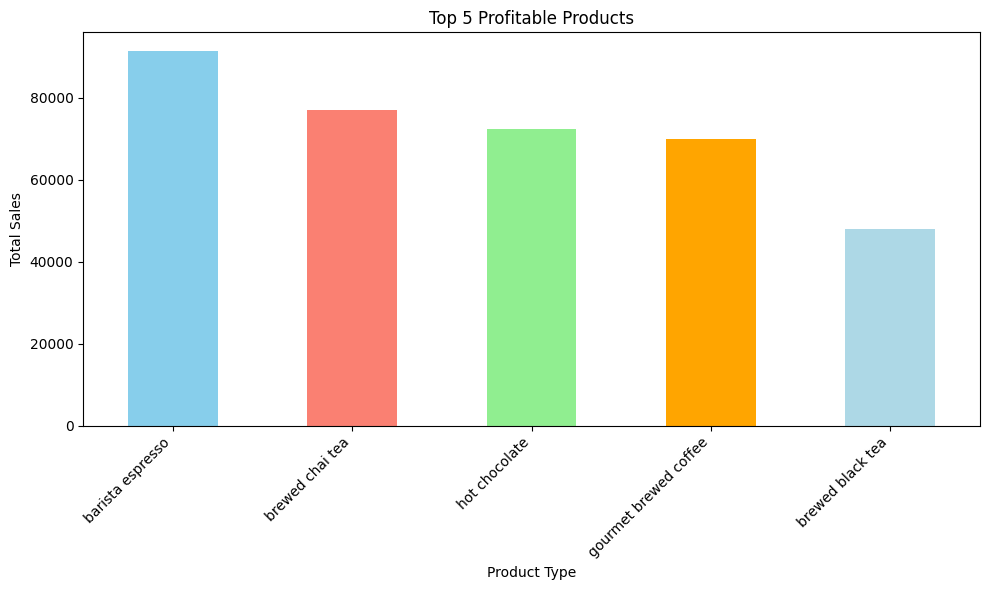

In [19]:
# Identify top 5 profitable products
top_profitable_products = product_sales.head(5)

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue']

# Plotting
plt.figure(figsize=(10, 6))
top_profitable_products.plot(kind='bar', color=colors)
plt.title('Top 5 Profitable Products')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

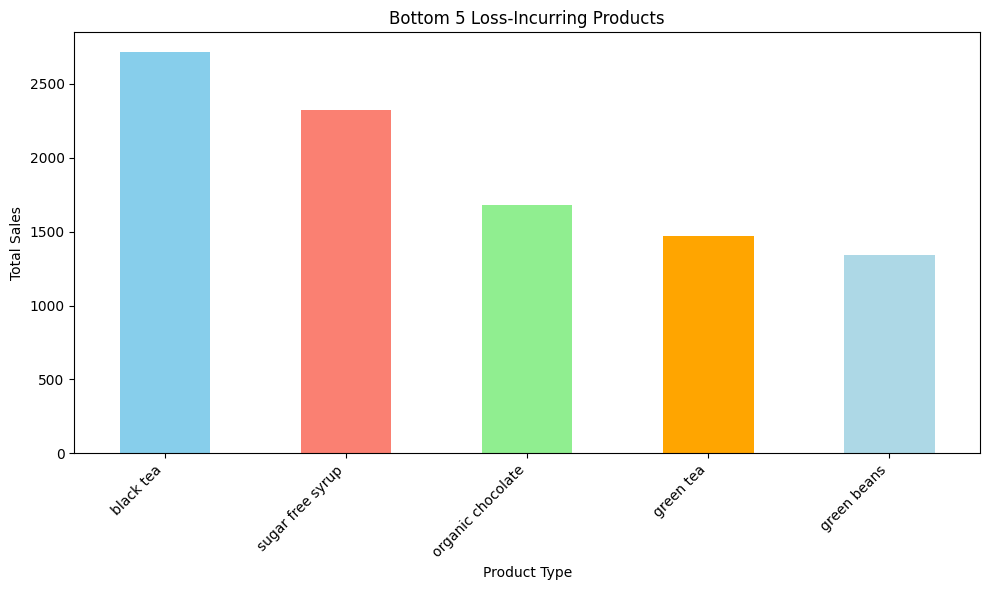

In [20]:
# Identify bottom 5 loss-incurring products
loss_products = product_sales.tail(5)

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue']

# Plotting
plt.figure(figsize=(10, 6))
loss_products.plot(kind='bar', color=colors)
plt.title('Bottom 5 Loss-Incurring Products')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Profit Increase Prediction:

*- Utilize predictive modeling techniques to forecast future profits.*

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
# Prepare the data
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'])
sales_data = df1.groupby('transaction_date')['total_sales'].sum().reset_index()
sales_data = sales_data.set_index('transaction_date')
sales_data.head()

,total_sales
transaction_date,
2023-01-01,2508.20
2023-01-02,2403.35
2023-01-03,2565.00
2023-01-04,2220.10
2023-01-05,2418.85


In [23]:
# Train-test split
train_size = int(len(sales_data) * 0.8)
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

In [24]:
# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [25]:
# Forecast
forecast = model_fit.forecast(steps=len(test_data))

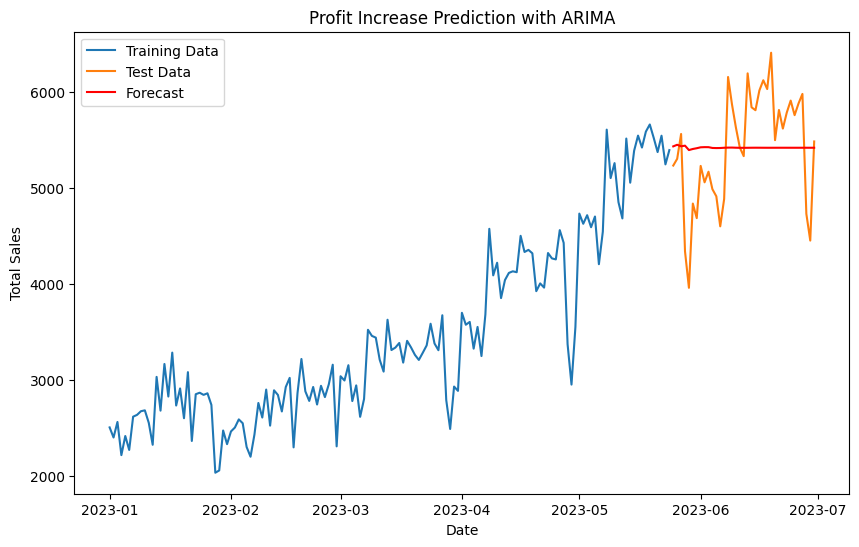

In [26]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Profit Increase Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data, forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 485.32898911188386
Mean Squared Error (MSE): 333611.53118981054
Root Mean Squared Error (RMSE): 577.5911453526712


In [28]:
forecast

2023-05-25    5430.320660
2023-05-26    5446.798982
2023-05-27    5431.093781
2023-05-28    5437.558614
2023-05-29    5391.788288
2023-05-30    5403.142056
2023-05-31    5411.060790
2023-06-01    5420.579123
2023-06-02    5422.245395
2023-06-03    5421.970986
2023-06-04    5413.716634
2023-06-05    5412.571230
2023-06-06    5413.261768
2023-06-07    5415.795339
2023-06-08    5417.311733
2023-06-09    5417.649035
2023-06-10    5416.213669
2023-06-11    5415.367005
2023-06-12    5415.110223
2023-06-13    5415.555005
2023-06-14    5416.069471
2023-06-15    5416.330092
2023-06-16    5416.154846
2023-06-17    5415.904152
2023-06-18    5415.741314
2023-06-19    5415.768080
2023-06-20    5415.887878
2023-06-21    5415.989709
2023-06-22    5415.997333
2023-06-23    5415.948166
2023-06-24    5415.893246
2023-06-25    5415.876043
2023-06-26    5415.893964
2023-06-27    5415.922408
2023-06-28    5415.936057
2023-06-29    5415.931508
2023-06-30    5415.918123
Freq: D, Name: predicted_mean, dtype: 

*- Explore factors contributing to profitability.*

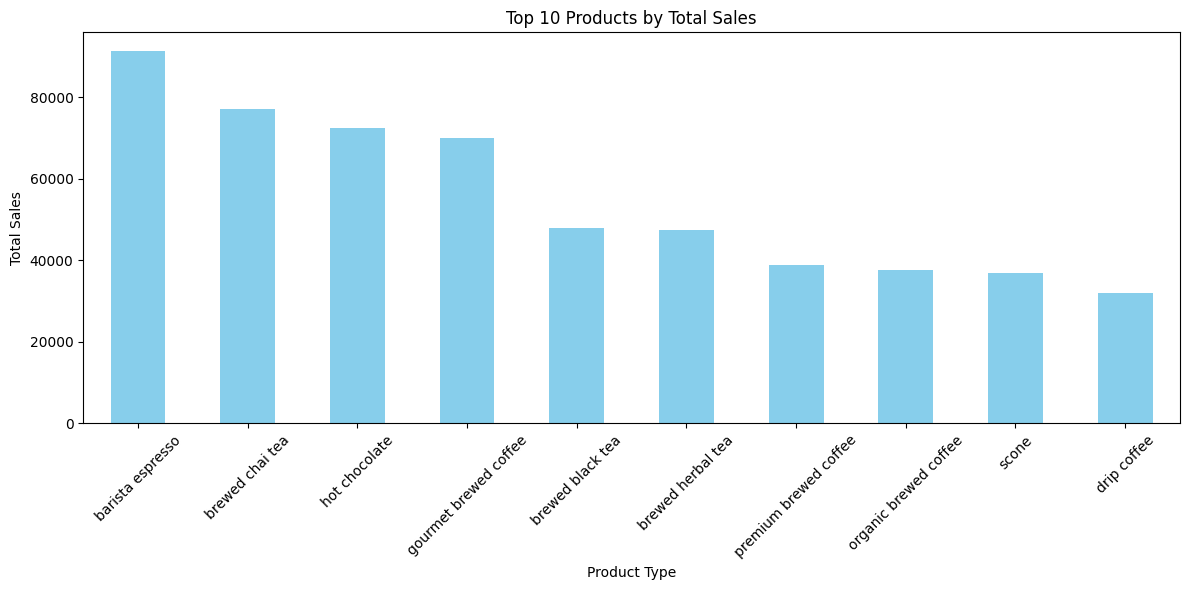

In [29]:
# 1. Product Sales Analysis
product_sales = df1.groupby('product_type')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
product_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

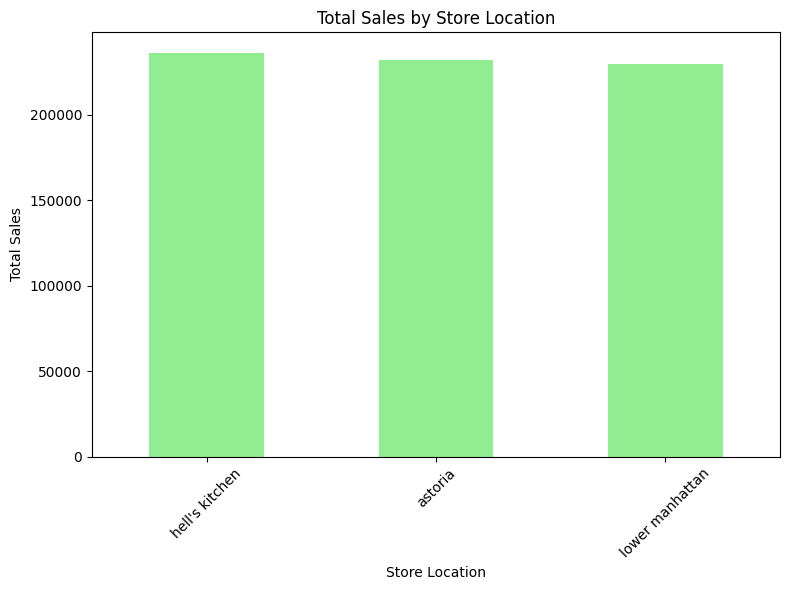

In [30]:
# 2. Store Location Analysis
store_sales = df1.groupby('store_location')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
store_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-31-912b4365074a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['transaction_time'] = pd.to_datetime(df1['transaction_time'])


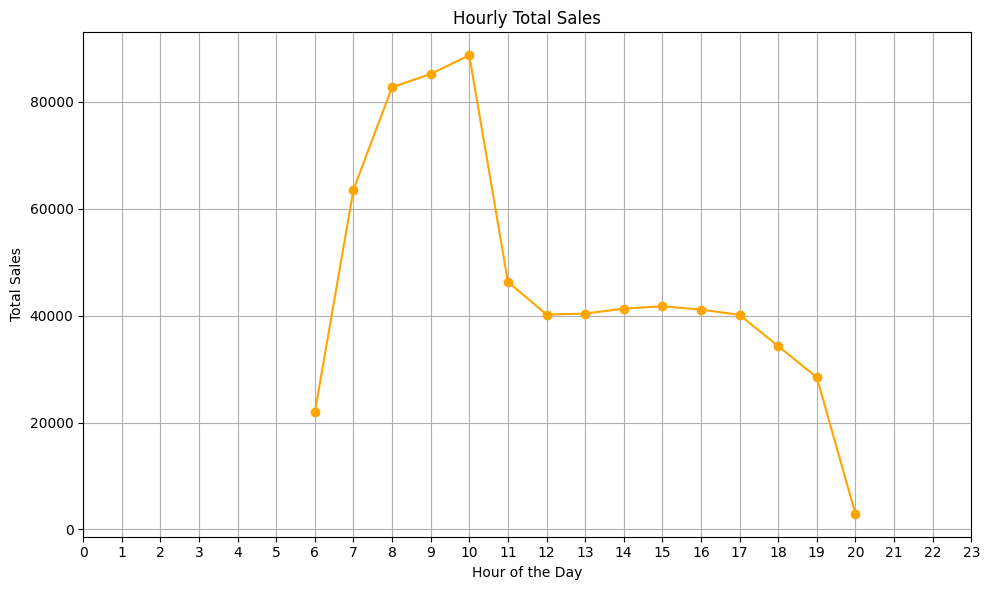

In [31]:
# 3. Transaction Time Analysis
df1['transaction_time'] = pd.to_datetime(df1['transaction_time'])
df1['hour'] = df1['transaction_time'].dt.hour
hourly_sales = df1.groupby('hour')['total_sales'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Total Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

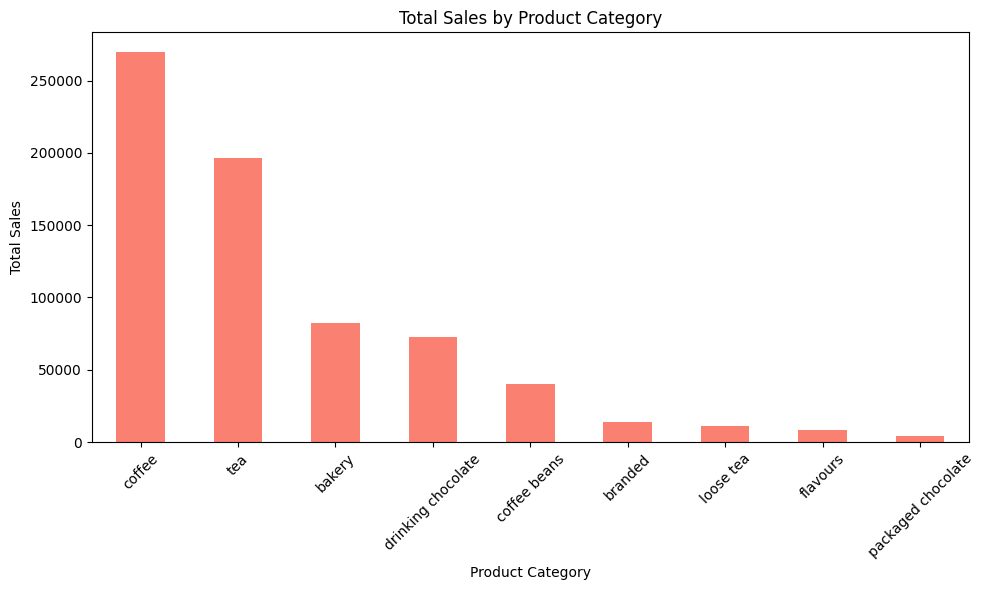

In [32]:
# 4. Product Category Analysis
product_category_sales = df1.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_category_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*- Provide recommendations on strategies to increase profit margins.*

In [33]:
# Calculate profit for each transaction
df1['total_sales'] = df1['unit_price'] * df1['transaction_qty']
df1['cost_price'] = 1.5  # Assuming a fixed cost per unit
df1['profit'] = df1['total_sales'] - df1['cost_price'] * df1['transaction_qty']

In [34]:
# Analyze product profitability
product_profitability = df1.groupby('product_type')['profit'].mean().sort_values(ascending=False)
print("Product Profitability:")
print(product_profitability)

Product Profitability:
product_type
premium beans            41.590774
clothing                 26.386878
organic beans            18.986747
gourmet beans            17.073770
house blend beans        16.500000
espresso beans           15.930251
housewares               12.569392
drinking chocolate        8.755789
green beans               8.500000
chai tea                  8.209368
green tea                 7.750000
herbal tea                7.450000
black tea                 7.450000
organic chocolate         6.100000
hot chocolate             4.031261
barista espresso          3.291575
premium brewed coffee     2.475065
pastry                    2.201170
brewed chai tea           2.194433
organic brewed coffee     2.147308
scone                     2.080863
biscotti                  1.945636
brewed herbal tea         1.916185
brewed black tea          1.915330
brewed green tea          1.905660
gourmet brewed coffee     1.837459
drip coffee               1.491978
regular syrup      

In [35]:
# Optimize pricing strategy (Example: Increase price of top-profit products by 10%)
top_profit_products = product_profitability.head(3).index
df1.loc[df1['product_type'].isin(top_profit_products), 'unit_price'] *= 1.10

In [36]:
# Segment customers (Example: Segment customers based on total purchase amount)
customer_segments = pd.qcut(df1.groupby('transaction_id')['total_sales'].sum(), q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print("\nCustomer Segments:")
print(customer_segments.head())


Customer Segments:
transaction_id
1         High
2    Very High
3    Very High
4          Low
5    Very High
Name: total_sales, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


In [37]:
# Analyze store performance (Example: Identify top-performing store locations)
store_profitability = df1.groupby('store_location')['profit'].sum().sort_values(ascending=False)
print("\nStore Profitability:")
print(store_profitability)


Store Profitability:
store_location
hell's kitchen     128905.67
astoria            125757.41
lower manhattan    122444.25
Name: profit, dtype: float64


In [38]:
# Identify cost reduction opportunities (Example: Analyze expenses)
expense_categories = df1.groupby('product_category')['cost_price'].sum().sort_values(ascending=False)
print("\nCost Reduction Opportunities:")
print(expense_categories)


Cost Reduction Opportunities:
product_category
coffee                87624.0
tea                   68173.5
bakery                34194.0
drinking chocolate    17202.0
flavours              10185.0
coffee beans           2629.5
loose tea              1815.0
branded                1120.5
packaged chocolate      730.5
Name: cost_price, dtype: float64


**On the above code we found the following factors**

1-We calculate the profit for each transaction based on the unit price, quantity, and assumed cost per unit.

2-We analyze product profitability by calculating the average profit for each product type.

3-We optimize the pricing strategy by increasing the price of the top-profit products by 10%.

4-We segment customers based on their total purchase amount and analyze store performance based on profitability.

5-We identify cost reduction opportunities by analyzing expenses, specifically the cost price of different product categories.

# - identify that which product can increase profit.

In [39]:
# Calculate average profit for each product type
product_profitability = df1.groupby('product_type')['profit'].mean().sort_values(ascending=False)
product_profitability

product_type
premium beans            41.590774
clothing                 26.386878
organic beans            18.986747
gourmet beans            17.073770
house blend beans        16.500000
espresso beans           15.930251
housewares               12.569392
drinking chocolate        8.755789
green beans               8.500000
chai tea                  8.209368
green tea                 7.750000
herbal tea                7.450000
black tea                 7.450000
organic chocolate         6.100000
hot chocolate             4.031261
barista espresso          3.291575
premium brewed coffee     2.475065
pastry                    2.201170
brewed chai tea           2.194433
organic brewed coffee     2.147308
scone                     2.080863
biscotti                  1.945636
brewed herbal tea         1.916185
brewed black tea          1.915330
brewed green tea          1.905660
gourmet brewed coffee     1.837459
drip coffee               1.491978
regular syrup            -1.069331
sugar f

In [40]:
# Identify products with the highest average profit
top_profit_products = product_profitability.head(3)
print("Top Profitable Products:")
print(top_profit_products)

Top Profitable Products:
product_type
premium beans    41.590774
clothing         26.386878
organic beans    18.986747
Name: profit, dtype: float64


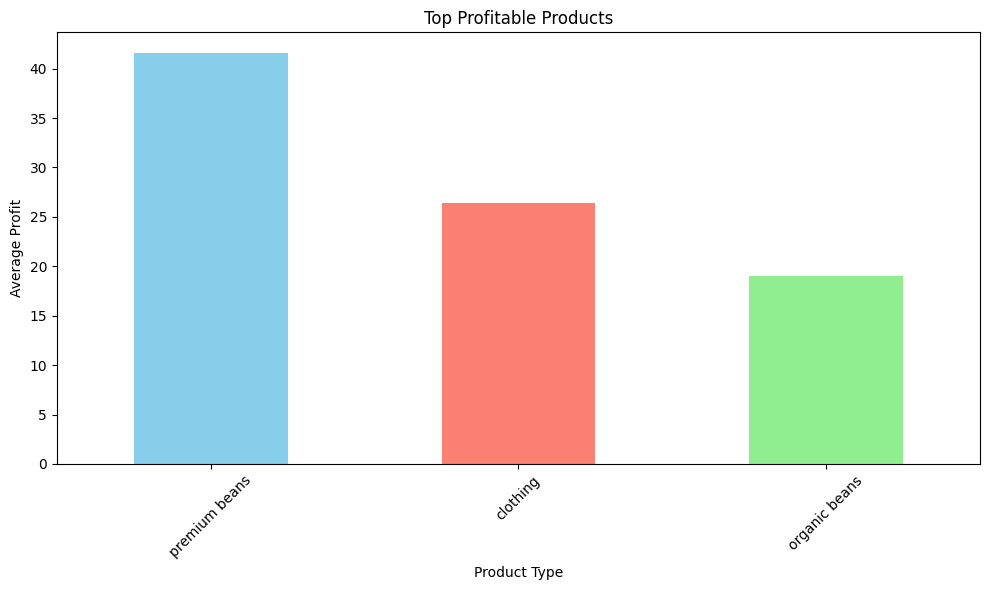

In [41]:
# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen']

# Plot top profitable products with different colors for each bar
plt.figure(figsize=(10, 6))
top_profit_products.plot(kind='bar', color=colors)
plt.title('Top Profitable Products')
plt.xlabel('Product Type')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**On the above we have found the following factors**

1-We calculate the profit for each transaction based on the unit price, quantity, and assumed cost per unit.

2-We calculate the average profit for each product type by grouping the data by product type and calculating the mean profit.

3-We identify the top profitable products by selecting the products with the highest average profit.

# 4. Loss Mitigation

*- Analyze factors contributing to losses for each product/service.*

In [42]:
# Calculate profit or loss for each transaction
df1['total_sales'] = df1['unit_price'] * df1['transaction_qty']
df1['cost_price'] = 1.5  # Assuming a fixed cost per unit
df1['profit_loss'] = df1['total_sales'] - df1['cost_price'] * df1['transaction_qty']

In [43]:
# Identify factors contributing to losses for each product/service
loss_factors = df1[df1['profit_loss'] < 0].groupby('product_type').size().sort_values(ascending=False)
loss_factors

product_type
regular syrup       4979
sugar free syrup    1811
dtype: int64

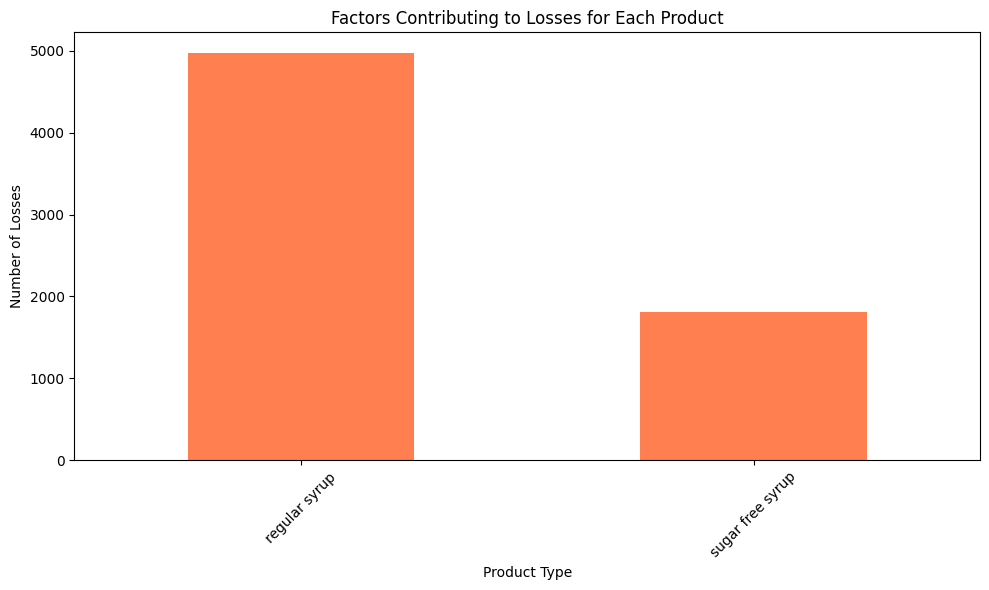

In [44]:
# Visualize factors contributing to losses
plt.figure(figsize=(10, 6))
loss_factors.plot(kind='bar', color='coral')
plt.title('Factors Contributing to Losses for Each Product')
plt.xlabel('Product Type')
plt.ylabel('Number of Losses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**On the above code**

1-We load the dataset and calculate the profit or loss for each transaction based on sales and costs.

2-We identify transactions where the profit is negative, indicating a loss.

3-We group these transactions by product type and count the number of losses for each product/service.

4-We visualize the factors contributing to losses for each product/service using a bar plot, where each bar represents the number of losses for a specific product/service.

*- Develop strategies to minimize or eliminate losses.*

In [45]:
# Calculate profit or loss for each transaction
df1['total_sales'] = df1['unit_price'] * df1['transaction_qty']
df1['cost_price'] = 1.5  # Assuming a fixed cost per unit
df1['profit_loss'] = df1['total_sales'] - df1['cost_price'] * df1['transaction_qty']

In [46]:
# Strategy 1: Product Mix Optimization
# Analyze profitability of each product category and consider discontinuing low-profit or high-loss products.
product_profitability = df1.groupby('product_category')['profit_loss'].mean().sort_values()
print("Product Profitability:")
print(product_profitability)

Product Profitability:
product_category
flavours              -1.083608
tea                    2.019856
bakery                 2.083464
coffee                 2.329455
drinking chocolate     4.031261
packaged chocolate     7.550595
loose tea              7.767438
branded               17.482329
coffee beans          22.619823
Name: profit_loss, dtype: float64


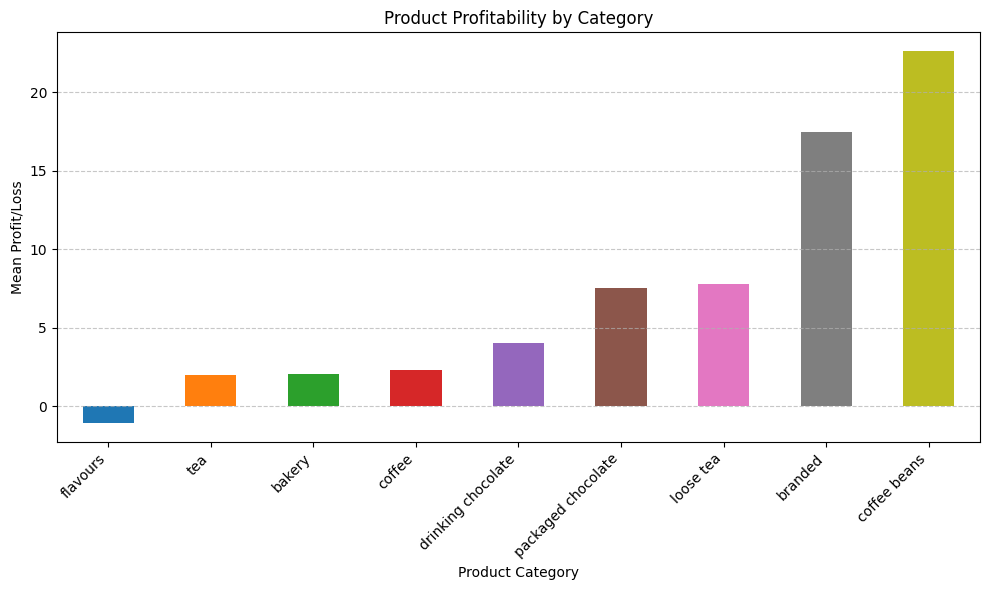

In [47]:
import matplotlib.pyplot as plt

# Define colors for the bar plot
colors = plt.cm.tab10(range(len(product_profitability)))

# Create a bar plot
plt.figure(figsize=(10, 6))
product_profitability.plot(kind='bar', color=colors)
plt.title('Product Profitability by Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Profit/Loss')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**On the above code**

1-We've grouped the data by the 'product_category' column and calculated the mean profit/loss for each category using the mean() function. This provides us with an overview of the average profitability of products within each category.

2-After calculating the profitability, we've sorted the results based on the mean profit/loss values in ascending order using the sort_values() function. This allows us to identify which product categories are performing better and which ones are underperforming.

3-We've visualized the profitability of each product category using a bar plot. Each bar represents a product category, and its height indicates the mean profit/loss. We've applied different colors to each bar to enhance visual distinction.

In [48]:
# Strategy 2: Pricing Strategy Adjustment
# Identify products experiencing losses
loss_products = df1[df1['profit_loss'] < 0].copy()  # Make a copy to avoid the warning

# Evaluate pricing strategy for loss products
# For this example, let's increase the prices of loss products by 10%
loss_products.loc[:, 'unit_price'] *= 1.10  # Using .loc to assign values

# Print the updated prices of loss products
print("Updated prices of loss products:")
print(loss_products[['product_id', 'product_type', 'unit_price']])

Updated prices of loss products:
        product_id      product_type  unit_price
3254            64     regular syrup        0.88
3291            63     regular syrup        0.88
3318            65  sugar free syrup        0.88
3325            65  sugar free syrup        0.88
3331            64     regular syrup        0.88
...            ...               ...         ...
148994          63     regular syrup        0.88
149013          63     regular syrup        0.88
149031          84     regular syrup        0.88
149059          65  sugar free syrup        0.88
149115          64     regular syrup        0.88

[6790 rows x 3 columns]


**On the above code**

1-We identify products experiencing losses by filtering transactions where the profit_loss is less than 0.

2-We evaluate the pricing strategy for loss products. In this example, we increase the prices of loss products by 10%. You can adjust the pricing adjustment strategy based on your specific pricing strategies and business needs.

3-Finally, we print the updated prices of loss products to observe the changes.

In [49]:
# Strategy 3: Cost Reduction Initiatives
# Determine opportunities to reduce product costs by optimizing supplier terms
# For this example, let's negotiate better terms with suppliers to reduce product costs by 5%
loss_products['cost_price'] *= 0.95

# Print the updated cost prices of loss products after cost reduction initiatives
print("Updated cost prices of loss products after cost reduction initiatives:")
print(loss_products[['product_id', 'product_type', 'cost_price']])

Updated cost prices of loss products after cost reduction initiatives:
        product_id      product_type  cost_price
3254            64     regular syrup       1.425
3291            63     regular syrup       1.425
3318            65  sugar free syrup       1.425
3325            65  sugar free syrup       1.425
3331            64     regular syrup       1.425
...            ...               ...         ...
148994          63     regular syrup       1.425
149013          63     regular syrup       1.425
149031          84     regular syrup       1.425
149059          65  sugar free syrup       1.425
149115          64     regular syrup       1.425

[6790 rows x 3 columns]


**On the above code**

1-We identify products experiencing losses by filtering transactions where the profit_loss is less than 0.

2-We implement a cost reduction initiative by optimizing supplier terms to reduce product costs. In this example, we reduce product costs by 5% through negotiating better terms with suppliers.

3-Finally, we print the updated cost prices of loss products after implementing the cost reduction initiatives.

In [50]:
# Perform customer segmentation based on purchasing behavior and preferences
# let's make a simple segmentation based on total sales.

# 1. Calculate total sales for each customer
customer_sales = df1.groupby('transaction_id')['total_sales'].sum().reset_index()

# 2. Segment customers based on total sales
# Define segmentation criteria (e.g., quartiles or custom thresholds)
sales_threshold = customer_sales['total_sales'].quantile(q=[0.25, 0.5, 0.75])

# Segment customers based on total sales
def segment_customer(row):
    if row['total_sales'] <= sales_threshold[0.25]:
        return 'Low Value'
    elif row['total_sales'] <= sales_threshold[0.50]:
        return 'Mid Value'
    elif row['total_sales'] <= sales_threshold[0.75]:
        return 'High Value'
    else:
        return 'Very High Value'

customer_sales['segment'] = customer_sales.apply(segment_customer, axis=1)

# 3. Target high-value customer segments
# Identify high-value segments based on specific business goals and segment characteristics
high_value_segments = ['High Value', 'Very High Value']  # Example high-value segments

# Filter customers belonging to high-value segments
high_value_customers = customer_sales[customer_sales['segment'].isin(high_value_segments)]

# Print high-value customers for further analysis
print("High-Value Customers:")
print(high_value_customers)

High-Value Customers:
        transaction_id  total_sales          segment
0                    1          6.0       High Value
1                    2          6.2  Very High Value
2                    3          9.0  Very High Value
4                    5          6.2  Very High Value
7                    8          4.0       High Value
...                ...          ...              ...
149107          149448          5.0       High Value
149109          149450          8.0  Very High Value
149110          149451          5.0       High Value
149111          149452          5.0       High Value
149112          149453          6.0       High Value

[71847 rows x 3 columns]


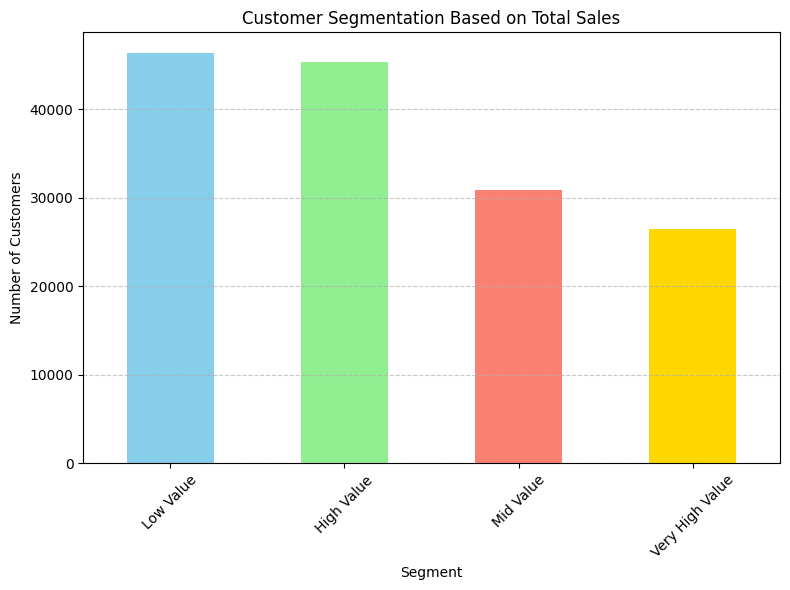

In [51]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Count the number of customers in each segment
segment_counts = customer_sales['segment'].value_counts()

# Create a bar plot with different colors
plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=colors)
plt.title('Customer Segmentation Based on Total Sales')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*- Propose actionable steps to convert loss-making products/services into profitable
ones.*

In [52]:
# Step 1: Identify Underperforming Products/Services
# Calculate profit or loss for each transaction
df1['total_sales'] = df1['unit_price'] * df1['transaction_qty']
df1['cost_price'] = 1.5  # Assuming a fixed cost per unit
df1['profit_loss'] = df1['total_sales'] - df1['cost_price'] * df1['transaction_qty']
df1.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,hour,cost_price,profit,profit_loss
0,1,2023-01-01,2024-05-09 07:06:11,2,5,lower manhattan,32,3.0,coffee,gourmet brewed coffee,ethiopia rg,6.0,7,1.5,3.0,3.0
1,2,2023-01-01,2024-05-09 07:08:56,2,5,lower manhattan,57,3.1,tea,brewed chai tea,spicy eye opener chai lg,6.2,7,1.5,3.2,3.2
2,3,2023-01-01,2024-05-09 07:14:04,2,5,lower manhattan,59,4.5,drinking chocolate,hot chocolate,dark chocolate lg,9.0,7,1.5,6.0,6.0
3,4,2023-01-01,2024-05-09 07:20:24,1,5,lower manhattan,22,2.0,coffee,drip coffee,our old time diner blend sm,2.0,7,1.5,0.5,0.5
4,5,2023-01-01,2024-05-09 07:22:41,2,5,lower manhattan,57,3.1,tea,brewed chai tea,spicy eye opener chai lg,6.2,7,1.5,3.2,3.2


In [53]:
# Step 2: Cost Reduction Initiatives
# Reduce cost price by 10% for loss-making products
loss_products = df1[df1['profit_loss'] < 0].copy()  # Make a copy to avoid the warning
loss_products.loc[:, 'cost_price'] *= 0.90  # Using .loc to assign values
loss_products

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,hour,cost_price,profit,profit_loss
3254,3284,2023-01-07,2024-05-09 06:27:23,2,5,lower manhattan,64,0.8,flavours,regular syrup,hazelnut syrup,1.6,6,1.35,-1.4,-1.4
3291,3321,2023-01-07,2024-05-09 07:44:17,1,5,lower manhattan,63,0.8,flavours,regular syrup,carmel syrup,0.8,7,1.35,-0.7,-0.7
3318,3348,2023-01-07,2024-05-09 08:09:37,1,8,hell's kitchen,65,0.8,flavours,sugar free syrup,sugar free vanilla syrup,0.8,8,1.35,-0.7,-0.7
3325,3355,2023-01-07,2024-05-09 08:18:07,1,5,lower manhattan,65,0.8,flavours,sugar free syrup,sugar free vanilla syrup,0.8,8,1.35,-0.7,-0.7
3331,3361,2023-01-07,2024-05-09 08:20:30,1,5,lower manhattan,64,0.8,flavours,regular syrup,hazelnut syrup,0.8,8,1.35,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148994,149335,2023-06-30,2024-05-09 17:33:45,1,8,hell's kitchen,63,0.8,flavours,regular syrup,carmel syrup,0.8,17,1.35,-0.7,-0.7
149013,149354,2023-06-30,2024-05-09 17:59:31,2,5,lower manhattan,63,0.8,flavours,regular syrup,carmel syrup,1.6,17,1.35,-1.4,-1.4
149031,149372,2023-06-30,2024-05-09 18:11:40,1,3,astoria,84,0.8,flavours,regular syrup,chocolate syrup,0.8,18,1.35,-0.7,-0.7
149059,149400,2023-06-30,2024-05-09 18:44:37,2,3,astoria,65,0.8,flavours,sugar free syrup,sugar free vanilla syrup,1.6,18,1.35,-1.4,-1.4


In [54]:
# Step 3: Pricing Strategy Adjustment
# Increase prices of loss-making products by 5%
loss_products['unit_price'] *= 1.05  # 5% increase
loss_products

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,hour,cost_price,profit,profit_loss
3254,3284,2023-01-07,2024-05-09 06:27:23,2,5,lower manhattan,64,0.84,flavours,regular syrup,hazelnut syrup,1.6,6,1.35,-1.4,-1.4
3291,3321,2023-01-07,2024-05-09 07:44:17,1,5,lower manhattan,63,0.84,flavours,regular syrup,carmel syrup,0.8,7,1.35,-0.7,-0.7
3318,3348,2023-01-07,2024-05-09 08:09:37,1,8,hell's kitchen,65,0.84,flavours,sugar free syrup,sugar free vanilla syrup,0.8,8,1.35,-0.7,-0.7
3325,3355,2023-01-07,2024-05-09 08:18:07,1,5,lower manhattan,65,0.84,flavours,sugar free syrup,sugar free vanilla syrup,0.8,8,1.35,-0.7,-0.7
3331,3361,2023-01-07,2024-05-09 08:20:30,1,5,lower manhattan,64,0.84,flavours,regular syrup,hazelnut syrup,0.8,8,1.35,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148994,149335,2023-06-30,2024-05-09 17:33:45,1,8,hell's kitchen,63,0.84,flavours,regular syrup,carmel syrup,0.8,17,1.35,-0.7,-0.7
149013,149354,2023-06-30,2024-05-09 17:59:31,2,5,lower manhattan,63,0.84,flavours,regular syrup,carmel syrup,1.6,17,1.35,-1.4,-1.4
149031,149372,2023-06-30,2024-05-09 18:11:40,1,3,astoria,84,0.84,flavours,regular syrup,chocolate syrup,0.8,18,1.35,-0.7,-0.7
149059,149400,2023-06-30,2024-05-09 18:44:37,2,3,astoria,65,0.84,flavours,sugar free syrup,sugar free vanilla syrup,1.6,18,1.35,-1.4,-1.4
